In [64]:
%matplotlib inline
import GEOparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import explained_variance_score, plot_roc_curve
import statsmodels.api as sm
from scipy.stats import ttest_ind, pearsonr
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklego.linear_model import LowessRegression

In [65]:
data = pd.read_csv("../Dataset/Bianchi2011/data.csv", index_col=0, skiprows=1)

In [66]:
# Remove breast problems
data = data[41:]

In [67]:
data

,CLASS,BDO/TUMOR MATCH,SET,GENDER,AGE,TYPE,STAGE,NODE TYPE,SMOKING STATUS,PACK_YEARS,...,hsa-miR-331-4373046.1,hsa-miR-342-4373040.1,hsa-miR-374-4373028.1,hsa-miR-376a-4373026.1,hsa-miR-432-4378076.1,hsa-miR-484-4381032.1,hsa-miR-486-4378096.1,hsa-miR-566-4380943.1,hsa-miR-92-4373013.1,hsa-miR-98-4373009.1
ID,,,,,,,,,,,,,,,,,,,,,
42,Lung Hamartoma,NaN,SYMPTOMATICS - PH,M,32,NaN,NaN,NaN,NO,0,...,0.00,-2.33,-0.62,0.72,1.30,0.26,0.83,1.55,0.21,0.95
43,Lung Hamartoma,NaN,SYMPTOMATICS - PH,M,64,NaN,NaN,NaN,EX,53,...,-1.41,0.92,-0.61,-0.07,1.33,0.45,0.60,1.47,0.03,0.79
44,Lung Hamartoma,NaN,SYMPTOMATICS - PH,F,44,NaN,NaN,NaN,NO,0,...,-0.47,1.90,0.47,-0.18,-0.55,1.03,2.23,1.67,0.88,-0.13
45,Lung Hamartoma,NaN,SYMPTOMATICS - PH,F,56,NaN,NaN,NaN,YES,25,...,-0.97,-0.96,0.23,-0.24,0.62,2.57,2.19,0.00,0.54,0.90
46,Lung Hamartoma,NaN,SYMPTOMATICS - PH,M,55,NaN,NaN,NaN,EX,30,...,2.17,-0.20,1.53,0.94,-1.38,-0.32,-0.74,0.00,-0.20,-0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Lung Tumor,NaN,TESTING,F,61,ADENO,IA,NaN,YES,47,...,0.00,0.78,-0.09,-0.86,0.68,1.15,1.25,0.74,0.43,0.52
250,Lung Tumor,NaN,TESTING,M,64,ADENO,IIB,NaN,YES,49,...,-0.55,1.10,-0.32,1.12,1.48,0.18,-0.31,1.69,0.08,0.26
251,Lung Tumor,NaN,TESTING,M,73,ADENO,IA,NaN,YES,54,...,0.84,0.08,0.53,1.12,1.18,-0.88,-1.34,1.69,-0.91,0.90


In [68]:
sick = data["CLASS"] == "Lung Tumor"
table = data.iloc[:, 11:]
table = table.iloc[:, :29]

In [69]:
controls = 1 - sick
mirnas = table.columns

### Drop NAN

In [70]:
table = table.fillna(table.min().min())

### T-test

In [71]:
X = table

In [72]:
X

,hsa-let-7a-4373169,hsa-let-7b-4373168,hsa-let-7d-4373166,hsa-miR-103-4373158,hsa-miR-126-4378064,hsa-miR-133b-4373172,hsa-miR-139-4373176,hsa-miR-140-4373138,hsa-miR-142-3p-4373136,hsa-miR-142-5p-4373135,...,hsa-miR-29a-4373065,hsa-miR-30b-4373290,hsa-miR-30c-4373060,hsa-miR-32-4373056,hsa-miR-328-4373049,hsa-miR-331-4373046,hsa-miR-342-4373040,hsa-miR-374-4373028,hsa-miR-376a-4373026,hsa-miR-432-4378076
ID,,,,,,,,,,,,,,,,,,,,,
42,-1.63,0.51,0.68,-0.40,-0.68,-0.23,-1.36,0.25,1.40,0.38,...,1.42,0.54,0.27,0.03,-0.62,0.00,1.67,1.02,-3.62,1.88
43,-1.70,0.71,0.41,-0.02,0.98,-1.14,0.38,-0.09,-0.50,-0.36,...,-0.72,0.45,-0.11,-0.85,-0.22,0.54,-0.66,1.00,0.34,1.92
44,-0.60,-1.69,-0.29,0.75,-0.08,-1.14,1.41,0.10,-0.76,-0.09,...,-0.20,0.69,0.39,-1.90,0.11,0.18,-1.36,-0.77,0.89,-0.79
45,-0.65,-1.46,-1.10,0.49,0.71,-1.14,1.78,0.46,-0.23,-0.45,...,-0.43,0.44,0.59,-1.76,0.33,0.37,0.69,-0.37,1.22,0.90
46,-0.32,-0.85,-0.79,-0.67,-1.09,-0.34,-0.94,-0.93,-0.26,-0.53,...,-0.56,-0.86,0.09,-0.41,-0.19,-0.83,0.14,-2.51,-4.70,-1.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-0.08,-1.58,-1.13,0.30,0.06,0.18,0.32,0.08,-0.63,0.59,...,0.28,0.00,-0.82,3.22,-0.64,0.00,-0.56,0.14,4.34,0.98
250,0.44,-0.43,-0.02,0.40,0.11,1.54,1.48,-0.15,-0.01,0.36,...,-0.75,-0.52,-0.02,3.69,0.41,0.21,-0.79,0.53,-5.64,2.13
251,-3.32,-1.16,-2.42,-2.37,-1.02,0.09,1.03,0.32,-1.82,-0.14,...,-0.58,-1.33,-1.21,2.24,0.80,-0.32,-0.06,-0.86,-5.64,1.70


In [73]:
X_healthy, X_cancer = X[controls == 1], X[sick == 1]

In [74]:
results = ttest_ind(X_healthy, X_cancer).pvalue

In [75]:
tvalues = ttest_ind(X_healthy, X_cancer).statistic

In [76]:
lowest, pvalues = np.argsort(results)[:10], np.sort(results)[:10]

In [77]:
mirnas[lowest], pvalues, tvalues[lowest]

(Index(['hsa-miR-432-4378076', 'hsa-miR-17-5p-4373119', 'hsa-miR-30c-4373060',
        'hsa-miR-148a-4373130', 'hsa-miR-342-4373040', 'hsa-miR-29a-4373065',
        'hsa-miR-142-5p-4373135', 'hsa-miR-140-4373138', 'hsa-miR-223-4373075',
        'hsa-miR-26b-4373069'],
       dtype='object'),
 array([5.16656913e-13, 7.29952938e-11, 3.44775812e-09, 4.63639479e-09,
        8.45041040e-07, 2.49414916e-06, 4.06596352e-06, 4.56669843e-06,
        5.62643823e-06, 7.63240701e-06]),
 array([-7.70326556,  6.86663368,  6.17088538, -6.11539106,  5.07666615,
        -4.8416803 , -4.73282396, -4.70668405, -4.65944416,  4.58977611]))

### F-test

In [78]:
t3 = table

In [79]:
f, p = f_classif(t3, sick)

In [80]:
np.mean(p)

0.07436676268363998

### ANOVA

In [81]:
t3

,hsa-let-7a-4373169,hsa-let-7b-4373168,hsa-let-7d-4373166,hsa-miR-103-4373158,hsa-miR-126-4378064,hsa-miR-133b-4373172,hsa-miR-139-4373176,hsa-miR-140-4373138,hsa-miR-142-3p-4373136,hsa-miR-142-5p-4373135,...,hsa-miR-29a-4373065,hsa-miR-30b-4373290,hsa-miR-30c-4373060,hsa-miR-32-4373056,hsa-miR-328-4373049,hsa-miR-331-4373046,hsa-miR-342-4373040,hsa-miR-374-4373028,hsa-miR-376a-4373026,hsa-miR-432-4378076
ID,,,,,,,,,,,,,,,,,,,,,
42,-1.63,0.51,0.68,-0.40,-0.68,-0.23,-1.36,0.25,1.40,0.38,...,1.42,0.54,0.27,0.03,-0.62,0.00,1.67,1.02,-3.62,1.88
43,-1.70,0.71,0.41,-0.02,0.98,-1.14,0.38,-0.09,-0.50,-0.36,...,-0.72,0.45,-0.11,-0.85,-0.22,0.54,-0.66,1.00,0.34,1.92
44,-0.60,-1.69,-0.29,0.75,-0.08,-1.14,1.41,0.10,-0.76,-0.09,...,-0.20,0.69,0.39,-1.90,0.11,0.18,-1.36,-0.77,0.89,-0.79
45,-0.65,-1.46,-1.10,0.49,0.71,-1.14,1.78,0.46,-0.23,-0.45,...,-0.43,0.44,0.59,-1.76,0.33,0.37,0.69,-0.37,1.22,0.90
46,-0.32,-0.85,-0.79,-0.67,-1.09,-0.34,-0.94,-0.93,-0.26,-0.53,...,-0.56,-0.86,0.09,-0.41,-0.19,-0.83,0.14,-2.51,-4.70,-1.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-0.08,-1.58,-1.13,0.30,0.06,0.18,0.32,0.08,-0.63,0.59,...,0.28,0.00,-0.82,3.22,-0.64,0.00,-0.56,0.14,4.34,0.98
250,0.44,-0.43,-0.02,0.40,0.11,1.54,1.48,-0.15,-0.01,0.36,...,-0.75,-0.52,-0.02,3.69,0.41,0.21,-0.79,0.53,-5.64,2.13
251,-3.32,-1.16,-2.42,-2.37,-1.02,0.09,1.03,0.32,-1.82,-0.14,...,-0.58,-1.33,-1.21,2.24,0.80,-0.32,-0.06,-0.86,-5.64,1.70


In [82]:
X = np.array(sick).reshape(-1, 1)

In [83]:
linreg = LinearRegression()
linreg.fit(X, t3)

LinearRegression()

In [84]:
fitted = linreg.predict(X)
explained_variance_score(t3, fitted)

0.06423630168488192

### Mean-variance-plot

In [85]:
np.mean(table)

hsa-let-7a-4373169       -0.142877
hsa-let-7b-4373168       -0.191934
hsa-let-7d-4373166       -0.076321
hsa-miR-103-4373158       0.027075
hsa-miR-126-4378064       0.013396
hsa-miR-133b-4373172     -0.207453
hsa-miR-139-4373176      -0.366557
hsa-miR-140-4373138      -0.062689
hsa-miR-142-3p-4373136   -0.022170
hsa-miR-142-5p-4373135    0.099528
hsa-miR-148a-4373130      0.350991
hsa-miR-148b-4373129      0.139104
hsa-miR-17-5p-4373119    -0.206557
hsa-miR-191-4373109       0.027830
hsa-miR-22-4373079        0.072642
hsa-miR-223-4373075      -0.027123
hsa-miR-26a-4373070      -0.003962
hsa-miR-26b-4373069      -0.078349
hsa-miR-28-4373067       -0.391604
hsa-miR-29a-4373065       0.176651
hsa-miR-30b-4373290      -0.049151
hsa-miR-30c-4373060      -0.176132
hsa-miR-32-4373056       -0.195142
hsa-miR-328-4373049      -0.047877
hsa-miR-331-4373046      -0.100472
hsa-miR-342-4373040      -0.049104
hsa-miR-374-4373028       0.001038
hsa-miR-376a-4373026     -0.505000
hsa-miR-432-4378076 

In [86]:
def get_means_and_variances(table):
    return np.mean(table), np.var(table, ddof=1)

In [87]:
def mean_variance_plot(table):
    means, variances = get_means_and_variances(table)
    plt.scatter(means, variances)
    plt.xlabel("mean")
    plt.ylabel("variance")
    plt.plot()

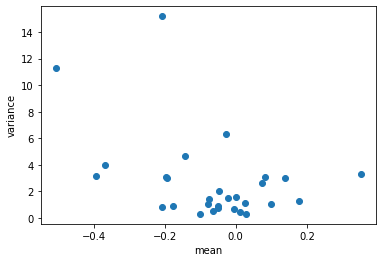

In [88]:
mean_variance_plot(table)

### Log transformation

In [89]:
log_table = table #np.log2(table)

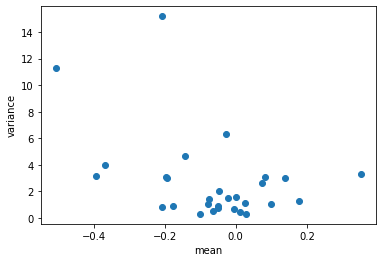

In [90]:
mean_variance_plot(log_table)

In [91]:
norm_log_table = log_table# - np.mean(log_table)

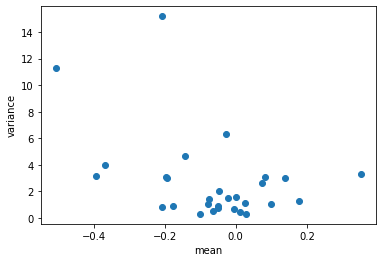

In [92]:
mean_variance_plot(norm_log_table)

### PCA

In [93]:
pca = decomposition.PCA(n_components=10)

In [94]:
pca.fit(norm_log_table)

PCA(n_components=10)

In [95]:
pca.explained_variance_ratio_

array([0.19872344, 0.17333712, 0.1308647 , 0.09899321, 0.06253799,
       0.06060186, 0.05137753, 0.03744123, 0.02975215, 0.02532577])

In [96]:
components = pca.transform(norm_log_table)

In [97]:
components.shape

(212, 10)

In [98]:
sum(controls)

117

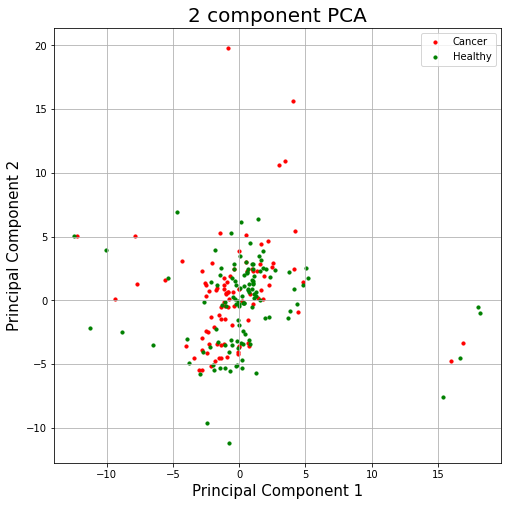

In [99]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

In [100]:
components2 = components[components[:,0] < 20, :]
controls2 = controls[components[:,0] < 20]

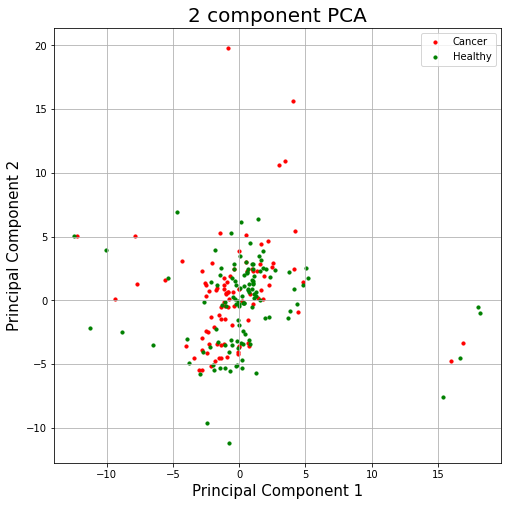

In [101]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components2[controls2 == False, 0], components2[controls2 == False, 1], c = 'r', s = 10)
ax.scatter(components2[controls2 == True, 0], components2[controls2 == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

### Linear regression adjustments

In [102]:
sex = data["GENDER"] == "F"
age = data["AGE"]
pack_years = data["PACK_YEARS"].replace("na", np.nan)

In [103]:
covars = pd.DataFrame(np.array([sex, age, pack_years]).transpose(), columns=["sex", "age", "pack years"])

In [104]:
covars["pack years"] = pd.to_numeric(covars["pack years"])

In [105]:
covars = covars.fillna(covars.mean())

In [106]:
covars.isna().sum()

sex           0
age           0
pack years    0
dtype: int64

In [107]:
linreg = LinearRegression()
linreg.fit(covars, norm_log_table)

LinearRegression()

In [108]:
adj_norm_log_table = norm_log_table# - linreg.predict(covars)

# PCA

In [109]:
pca = decomposition.PCA(n_components=2)

In [110]:
pca.fit(adj_norm_log_table)

PCA(n_components=2)

In [111]:
components = pca.transform(adj_norm_log_table)

In [112]:
components

array([[-8.17674086e-03, -1.90942782e+00],
       [ 1.24551563e+00,  6.99154584e-01],
       [ 1.12835447e+00,  1.80862092e-01],
       [ 1.13102920e+00,  5.04110998e-01],
       [-1.08780654e+00, -5.31008268e+00],
       [ 6.09582947e-01,  2.26813196e+00],
       [-3.82898873e-01,  2.44529055e+00],
       [-1.24211504e+01,  5.06360124e+00],
       [-1.70837626e-01, -3.18684448e+00],
       [ 3.85001766e-01,  1.11796685e+00],
       [ 2.67147047e-01, -3.37796807e+00],
       [-5.65711982e-01,  1.79432983e+00],
       [ 1.62230533e+00,  3.14265063e+00],
       [ 2.76382440e-01, -2.37986589e+00],
       [-4.70549017e+00,  6.93331862e+00],
       [ 3.83142266e+00, -8.21907042e-01],
       [ 1.23285223e+00, -5.71333951e+00],
       [ 6.27468713e-01,  9.29753257e-01],
       [-1.12730730e+01, -2.12503528e+00],
       [ 1.43181993e+00,  6.40322818e+00],
       [-2.22137819e+00, -3.61550128e+00],
       [ 1.02485735e+00,  1.31693626e+00],
       [-7.11458125e-02, -3.74251309e+00],
       [-1.

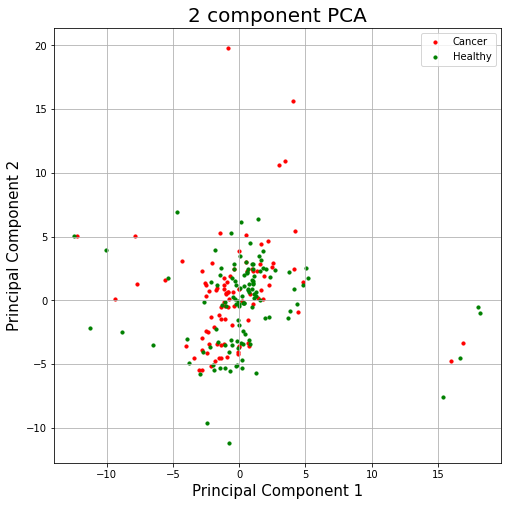

In [113]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

### Logistic Regression

In [114]:
X_train, X_test, y_train, y_test = train_test_split(adj_norm_log_table, controls, test_size=0.33, random_state=42)

In [115]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

C:\Users\olefr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


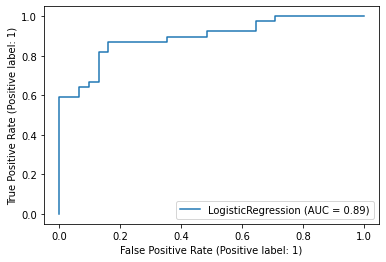

In [116]:
plot_roc_curve(model, X_test, y_test)

### XGBoost

In [117]:
model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)

[17:42:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

C:\Users\olefr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


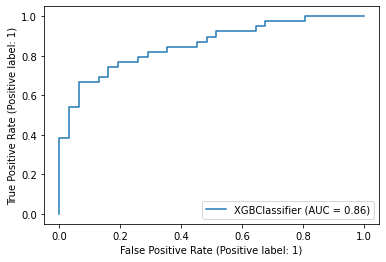

In [118]:
plot_roc_curve(model, X_test, y_test)

### Export data

In [119]:
lookup_table_gpl = pd.read_csv("../Others/GPL8695.tsv", sep="\t")
lookup_table_gpl.head()

,ID,miRNA_ID,Part Number
0,hsa-miR-99b-4373007,hsa-miR-99b,4373007
1,hsa-miR-99a-4373008,hsa-miR-99a,4373008
2,hsa-miR-98-4373009,hsa-miR-98,4373009
3,hsa-miR-96-4373010,hsa-miR-96,4373010
4,hsa-miR-95-4373011,hsa-miR-95,4373011


In [120]:
from Scripts.converters import canonical_to_seq

In [121]:
mirbase_names = [c[:-8] for c in table.columns]

In [122]:
sequences = canonical_to_seq(mirbase_names)

In [123]:
adj_norm_log_table.columns = sequences
#adj_norm_log_table *= -1
adj_norm_log_table["cancer"] = sick
adj_norm_log_table.head()

,UGAGGUAGUAGGUUGUAUAGUU,CGGGGUGAGGUAGUAGGUUGUGUGGUUUCAGGGCAGUGAUGUUGCCCCUCGGAAGAUAACUAUACAACCUACUGCCUUCCCUG,CCUAGGAAGAGGUAGUAGGUUGCAUAGUUUUAGGGCAGGGAUUUUGCCCACAAGGAGGUAACUAUACGACCUGCUGCCUUUCUUAGG,AGCAGCAUUGUACAGGGCUAUGA,UCGUACCGUGAGUAAUAAUGCG,UUUGGUCCCCUUCAACCAGCUA,UCUACAGUGCACGUGUCUCCAGU,CAGUGGUUUUACCCUAUGGUAG,UGUAGUGUUUCCUACUUUAUGGA,CAUAAAGUAGAAAGCACUACU,...,UGUAAACAUCCUACACUCAGCU,UGUAAACAUCCUACACUCUCAGC,UAUUGCACAUUACUAAGUUGCA,CUGGCCCUCUCUGCCCUUCCGU,GCCCCUGGGCCUAUCCUAGAA,UCUCACACAGAAAUCGCACCCGU,UUAUAAUACAACCUGAUAAGUG,AUCAUAGAGGAAAAUCCACGU,UCUUGGAGUAGGUCAUUGGGUGG,cancer
ID,,,,,,,,,,,,,,,,,,,,,
42,-1.63,0.51,0.68,-0.40,-0.68,-0.23,-1.36,0.25,1.40,0.38,...,0.54,0.27,0.03,-0.62,0.00,1.67,1.02,-3.62,1.88,False
43,-1.70,0.71,0.41,-0.02,0.98,-1.14,0.38,-0.09,-0.50,-0.36,...,0.45,-0.11,-0.85,-0.22,0.54,-0.66,1.00,0.34,1.92,False
44,-0.60,-1.69,-0.29,0.75,-0.08,-1.14,1.41,0.10,-0.76,-0.09,...,0.69,0.39,-1.90,0.11,0.18,-1.36,-0.77,0.89,-0.79,False
45,-0.65,-1.46,-1.10,0.49,0.71,-1.14,1.78,0.46,-0.23,-0.45,...,0.44,0.59,-1.76,0.33,0.37,0.69,-0.37,1.22,0.90,False
46,-0.32,-0.85,-0.79,-0.67,-1.09,-0.34,-0.94,-0.93,-0.26,-0.53,...,-0.86,0.09,-0.41,-0.19,-0.83,0.14,-2.51,-4.70,-1.99,False


In [124]:
#adj_norm_log_table.to_csv("../TransformedData/Bianchi2011_adjusted.csv", index=False)

In [125]:
mask = np.array([m in ["Lung Tumor", "Normal"] for m in data["CLASS"]])
clean_adj_norm_log_table = adj_norm_log_table.loc[mask]

In [126]:
clean_adj_norm_log_table.to_csv("../TransformedData/Bianchi2011_raw.csv", index=False)